In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sqlalchemy import text
from src.data.utils import create_connection_psql
from src import PG_CREDENTIALS, QUERIES, FIGURES

In [2]:
engine = create_connection_psql(PG_CREDENTIALS)


In [3]:
with open((QUERIES / 'psql' / 'get_distinct_tickers.q'), 'r') as f:
    distinct_tickers_query = f.read()
rs = engine.execute(text(distinct_tickers_query),
                           startdate=0, enddate=99999999999)
results = rs.fetchall()
idx_ticker = {i: ticker[0] for i, ticker in enumerate(results)}
ticker_idx = {ticker[0]: i for i, ticker in enumerate(results)}

In [4]:
G = nx.Graph()
with open((QUERIES / 'psql' / 'edges_nyt.q'), 'r') as f:
    sec_ownership_query = f.read()
rs = engine.execute(text(sec_ownership_query),
                    startdate=0, enddate=99999999999)
results = rs.fetchall()

for _, _, a, b, _ in results:
    if a in ticker_idx and b in ticker_idx:
        G.add_edge(ticker_idx[a], ticker_idx[b])

In [5]:
G2 = nx.Graph()
with open((QUERIES / 'psql' / 'article_pair_counts.q'), 'r') as f:
    nyt_query = f.read()
rs = engine.execute(text(nyt_query),
                    startdate=0, enddate=99999999999)
results = rs.fetchall()

for _, a, b, _ in results:
    if a in ticker_idx and b in ticker_idx:
        G2.add_edge(ticker_idx[a], ticker_idx[b])


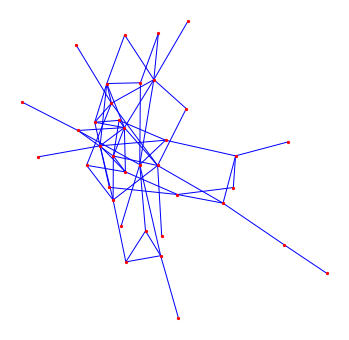

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw(G, node_color='r', edge_color='b',
        node_size=5, ax=ax)
plt.savefig((FIGURES / 'sec_graph'))

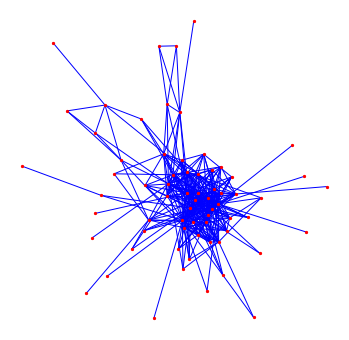

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw(G2, node_color='r', edge_color='b',
        node_size=5, ax=ax)
plt.savefig((FIGURES / 'nyt_graph'))